# MGMTMSA 408 -- Lecture 7: Bandits with Covariates

In this notebook, we will build on the bandit problem that we saw before to add another layer of complexity, which is covariates. 

In particular, in the website that we are building, we are assuming there are four attributes, all of which are treated as factor variables:
- `fontsize`: one of: 11 (default), 12, 13, 14
- `colorscheme`: one of: `blackwhite` (default), `redblue`, `purpleyellow`, `greenwhite`
- `logoposition`: one of `center` (default), `top`, `left`, `bottom`
- `welcomemessage`: one of 1 (default), 2, 3, 4, 5 

The cell below defines several variables, including the parameters of the true logistic regression model that underlies the rewards, and the function `generate_reward`, which draws a random Bernoulli reward given an action vector `a`. 

In [2]:
import numpy as np

T = 500

attribute_names = ["intercept",
                "fontsize_12",
                "fontsize_13",
                "fontsize_14",
                "colorscheme_redblue",
                "colorscheme_purpleyellow",
                "colorscheme_greenwhite",
                "logoposition_top",
                "logoposition_left",
                "logoposition_bottom",
                "welcomemessage_2",
                "welcomemessage_3",
                "welcomemessage_4",
                "welcomemessage_5"]
nAttributes = 4
att_groups = [ [0,1,2], [3,4,5], [6,7,8], [9,10,11,12] ]

# Parameters of the true reward model
beta_intercept = -1.2;
beta_coeffs = np.array([0.11,0.31,0.25,-0.42,0.23,-0.12,0.12,0.15,0.05,-0.05,-0.25,-0.13,+0.1])

# Function to generate a random reward. 
def generate_reward(a):
    logit = beta_intercept + np.dot(beta_coeffs,a)
    prob = 1/(1+np.exp( - logit ))
    return int(np.random.rand() < prob)


The next cell defines a function to randomly draw an action vector (corresponding to the dummy variables of each of the four variables' levels). 

In [3]:
# The function random_a() will draw a random vector 
def random_a():
    a = np.zeros(len(beta_coeffs))
    for att in range(nAttributes):
        ind = np.random.choice(att_groups[att] + [-1])
        if (ind != -1):
            a[ind] = 1.0
    return a
        
print(random_a())
print(random_a())
print(random_a())

[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]


Finally, we are ready to create our bootstrap Thompson sampling policy. 

In [4]:
from sklearn.linear_model import LogisticRegression

# Define the bootstrap Thompson sampling policy function:
burnin_period = 30
def policy_BTS(t, single_action_history, reward_history):
    # For the first few periods, take a random action. 
    if (t < burnin_period):
        return random_a()
    else:
        # Generate an array with the number of times each prior action appears in the bootstrapped sample.
        # The code is set up this way because the logistic regression fit() function allows one to conveniently 
        # specify a weight for each training data point. 
        bootstrap_weight = np.random.multinomial(t, 1/t*np.ones(t))
        TS_logreg = LogisticRegression().fit( single_action_history,reward_history, sample_weight = bootstrap_weight)
        
        # Extract the ecoefficients
        beta_coeffs_hat = TS_logreg.coef_[0]
        
        # Maximizing the conversion probability with respect to beta_coeffs_hat is equivalent 
        # to finding which a's should be 0/1 to maximize the logit. This can be done by looking
        # at each factor variable and figuring out which level of the factor has the highest 
        # coefficient. If all of them are negative, then we should just set the variable to 
        # the default level. 
        a = np.zeros(len(beta_coeffs))
        for att in range(nAttributes):
            ind = np.argmax( beta_coeffs_hat[att_groups[att]])
            if (beta_coeffs_hat[ind] > 0):
                a[ind] = 1
        return a

# Run the simulation 
np.random.seed(200)
nSims = 100
cumulative_reward = np.zeros( (nSims, T) )
action_history = []
for s in range(nSims):
    print("sim = ", s)
    single_action_history = np.zeros( (0, len(beta_coeffs)))
    reward_history = []
    for t in range(T):
        a = policy_BTS(t, single_action_history, reward_history)
        reward = generate_reward(a)
        reward_history.append(reward)
        single_action_history = np.vstack( (single_action_history, a))
        cumulative_reward[s,t] = sum(reward_history)
    action_history.append(single_action_history)

action_history_BTS = action_history.copy()
mean_cumulative_reward_BTS = cumulative_reward.mean(axis = 0)
print("Cumulative reward (BTS): ", mean_cumulative_reward_BTS[-1])
print("Average per-period reward (BTS): ", mean_cumulative_reward_BTS[-1] / T)




sim =  0
sim =  1
sim =  2
sim =  3
sim =  4
sim =  5
sim =  6
sim =  7
sim =  8
sim =  9
sim =  10
sim =  11
sim =  12
sim =  13
sim =  14
sim =  15
sim =  16
sim =  17
sim =  18
sim =  19
sim =  20
sim =  21
sim =  22
sim =  23
sim =  24
sim =  25
sim =  26
sim =  27
sim =  28
sim =  29
sim =  30
sim =  31
sim =  32
sim =  33
sim =  34
sim =  35
sim =  36
sim =  37
sim =  38
sim =  39
sim =  40
sim =  41
sim =  42
sim =  43
sim =  44
sim =  45
sim =  46
sim =  47
sim =  48
sim =  49
sim =  50
sim =  51
sim =  52
sim =  53
sim =  54
sim =  55
sim =  56
sim =  57
sim =  58
sim =  59
sim =  60
sim =  61
sim =  62
sim =  63
sim =  64
sim =  65
sim =  66
sim =  67
sim =  68
sim =  69
sim =  70
sim =  71
sim =  72
sim =  73
sim =  74
sim =  75
sim =  76
sim =  77
sim =  78
sim =  79
sim =  80
sim =  81
sim =  82
sim =  83
sim =  84
sim =  85
sim =  86
sim =  87
sim =  88
sim =  89
sim =  90
sim =  91
sim =  92
sim =  93
sim =  94
sim =  95
sim =  96
sim =  97
sim =  98
sim =  99
Cumulative

## Alternative approach: ordinary Thompson sampling

As a comparison to bootstrap Thompson sampling, we could implement ordinary Thompson sampling. To do this, we need to enumerate out all of the possible actions. There are $4 \times 4 \times 4 \times 5 = 320$ possible designs, so we effectively need to think about $p_1, p_2, \dots, p_{320}$ as being the unknown conversion probabilities. 

Before we can test this policy out, there is some legwork we need to do to enumerate all of the possible designs, and calculate their conversion probabilities. 

In [4]:
# Alternate approach: treat each design as separate
import copy 

# First, create att_groups_2 where each inner list includes a "-1" 
# corresponding to the default value of the attribute.
att_groups_2 = [ S+[-1] for S in att_groups]
print(att_groups_2)

# Now, we will enumerate all combinations of the values in the inner lists
# in att_groups_2, for which we will use itertools.
import itertools

att_combinations = itertools.product( *att_groups_2)
att_combinations_list = list(att_combinations)
nCombinations = len(att_combinations_list)

# The loop below converts the combinations in att_combinations_list into
# dummy variable / one-hot encoding. 
att_vecs = np.zeros( (nCombinations, len(beta_coeffs)) )
for i in range(nCombinations):
    for att in range(nAttributes):
        if (att_combinations_list[i][att] != -1):
            att_vecs[i,att_combinations_list[i][att]] = 1

# Print the first 10 values to see what they look like:
print(att_vecs[0:20,:])

# Calculate the logit of each design, and the conversion probability.
logits = beta_intercept + np.dot(att_vecs, beta_coeffs)
p = 1/(1+ np.exp(-logits))



[[0, 1, 2, -1], [3, 4, 5, -1], [6, 7, 8, -1], [9, 10, 11, 12, -1]]
[[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


We are now ready to implement our Thompson sampling policy. The code below is essentially the same as in the previous notebook (with $K = 3$). 

In [5]:
# Define the Thompson sampling policy function:
def policy_TS(t, Y, N):
    alpha = 1 + Y
    beta = 1 + N - Y 
    theta = np.random.beta(alpha,beta)
    a = np.argmax(theta)
    return a 

def generate_reward_v2( a ):
    return int( np.random.rand() < p[a])

K = nCombinations
    

# Run the simulation 
np.random.seed(200)
nSims = 100
cumulative_reward = np.zeros( (nSims, T) )
action_history = np.zeros( (nSims, T))
for s in range(nSims):
    Y = np.zeros(K)
    N = np.zeros(K)
    for t in range(T):
        a = policy_TS(t, Y, N)
        reward = generate_reward_v2(a)
        Y[a] += reward
        N[a] += 1
        cumulative_reward[s,t] = sum(Y)
        action_history[s,t] = a

action_history_TS = action_history.copy()
mean_cumulative_reward_TS = cumulative_reward.mean(axis = 0)
print("Cumulative reward (ordinary TS): ", mean_cumulative_reward_TS[-1])
print("Average per-period reward (ordinary TS): ", mean_cumulative_reward_TS[-1] / T)

Cumulative reward:  130.06
Average per-period reward:  0.26012


## Understanding the quality of decisions

To understand the quality of bootstrap Thompson sampling vs. ordinary Thompson sampling, we can plot the average true logit of the selected action over time for both policies.

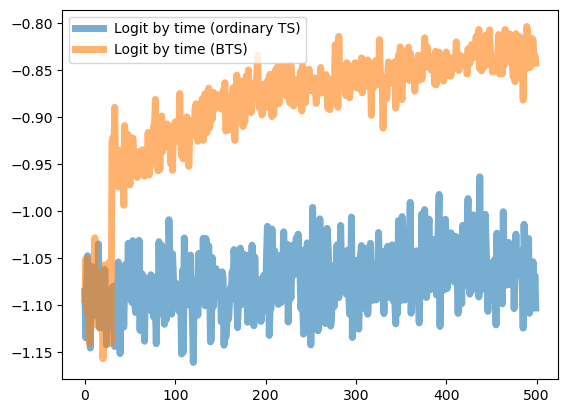

In [8]:
# To understand the quality of our decisions, let's plot the average logit (over the simulations)
# of the selected action over time.
import matplotlib.pyplot as plt

# Line below calculates the logit by time for the ordinary TS policy.
logit_by_time_TS = [ sum( logits[int(action_history_TS[s,t])] for s in range(nSims))/nSims for t in range(T)]

# For the BTS policy, it is a bit more complicated; 
logit_by_time_BTS = np.zeros(T)
for t in range(T):
    logit_by_time_BTS[t] = sum( beta_intercept +np.dot(beta_coeffs, action_history_BTS[s][t]) for s in range(nSims)) / nSims


# logit_by_time_BTS = [ sum( logits[int(action_history_BTS[s,t])] for s in range(nSims))/nSims for t in range(T)]

plt.plot(range(T), logit_by_time, '-', lw=5, alpha=0.6, label='Logit by time (ordinary TS)')
plt.plot(range(T), logit_by_time_BTS, '-', lw=5, alpha=0.6, label='Logit by time (BTS)')
plt.legend()

From this plot, we can see that the quality of decisions from BTS is generally better than ordinary TS, and seems to be improving faster. This makes sense, because the BTS policy is using the fact that the action covariates are predictive of the conversion probability of an action. In contrast, ordinary TS treats each action as entirely separate, and taking an action $a$ in the ordinary TS policy only improves our knowledge of the conversion probability of action $a$, but not of any other action.

Lastly, we can also compare the policies in terms of regret:

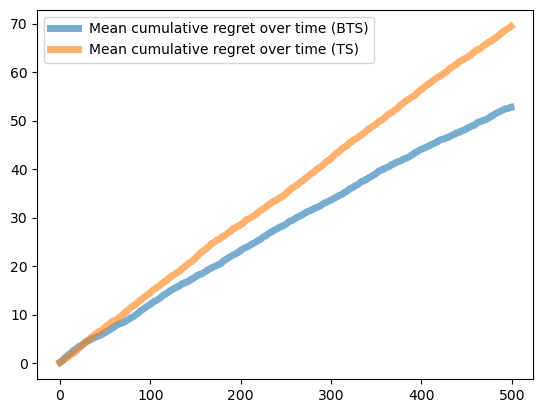

In [9]:
plt.plot(range(T), max(p)*range(1,T+1)-mean_cumulative_reward_BTS , '-', lw=5, alpha=0.6, label='Mean cumulative regret over time (BTS)')
plt.plot(range(T), max(p)*range(1,T+1)-mean_cumulative_reward_TS , '-', lw=5, alpha=0.6, label='Mean cumulative regret over time (TS)')
plt.legend()